In [5]:
import numpy as np
import pandas as pd
import cmocean as cm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt

In [6]:
import scipy

In [7]:
from datetime import timedelta

In [8]:
plt.style.use('default')

In [9]:
%matplotlib inline

In [10]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 0
plt.rcParams['lines.markersize'] = 3
plt.rcParams['pcolor.shading'] = 'nearest'

In [11]:
cd '/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos'

/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos


In [12]:
uboia = pd.read_csv('adcp-zonal-limpo.csv', delimiter= ';')
vboia = pd.read_csv('adcp-meridional-limpo.csv', delimiter= ';')

In [13]:
uboia.time.iloc[0], uboia.time.iloc[-1]

('2016-11-18 20:00:00', '2017-12-04 13:00:00')

In [14]:
u = np.array(uboia.iloc[:,0:20])
v = np.array(vboia.iloc[:,0:20])

In [15]:
np.nanmin(u), np.nanmean(u), np.nanmax(u)

(-176.0696626222512, -30.248409751466692, 95.20883293297857)

In [16]:
np.nanmin(v), np.nanmean(v), np.nanmax(v)

(-179.0617718317904, 19.703146960272864, 3062.3)

### calculo das componentes paralelas e perpendiculares

In [17]:
phi = np.deg2rad(60)
ul = u * np.cos(phi) + v * np.sin(phi)
vl = -u * np.sin(phi) + v * np.cos(phi)

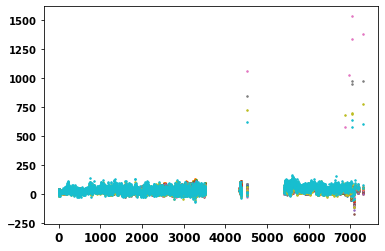

In [18]:
plt.plot(vl,'.');

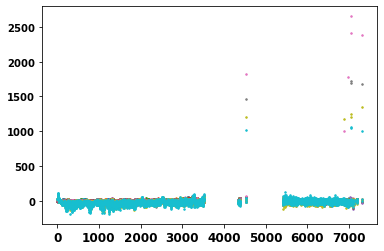

In [19]:
plt.plot(ul,'.');

In [20]:
ul[ul>250] = np.NaN;
vl[vl>250] = np.NaN;

/tmp/ipykernel_38869/2825997406.py:1: RuntimeWarning: invalid value encountered in greater
  ul[ul>250] = np.NaN;
/tmp/ipykernel_38869/2825997406.py:2: RuntimeWarning: invalid value encountered in greater
  vl[vl>250] = np.NaN;


In [21]:
# profundidades
depth = np.arange(-5.5, -55, -2.5)

In [22]:
depth.shape

(20,)

In [23]:
# tempos
time = mdates.date2num(vboia.time)

In [24]:
# tempo e profundidade 2D
depth2d, time2d  = np.meshgrid(depth, time)

<p style="font-size:20px; color:orangered"> Plot 2D profundidade vs tempo </p>

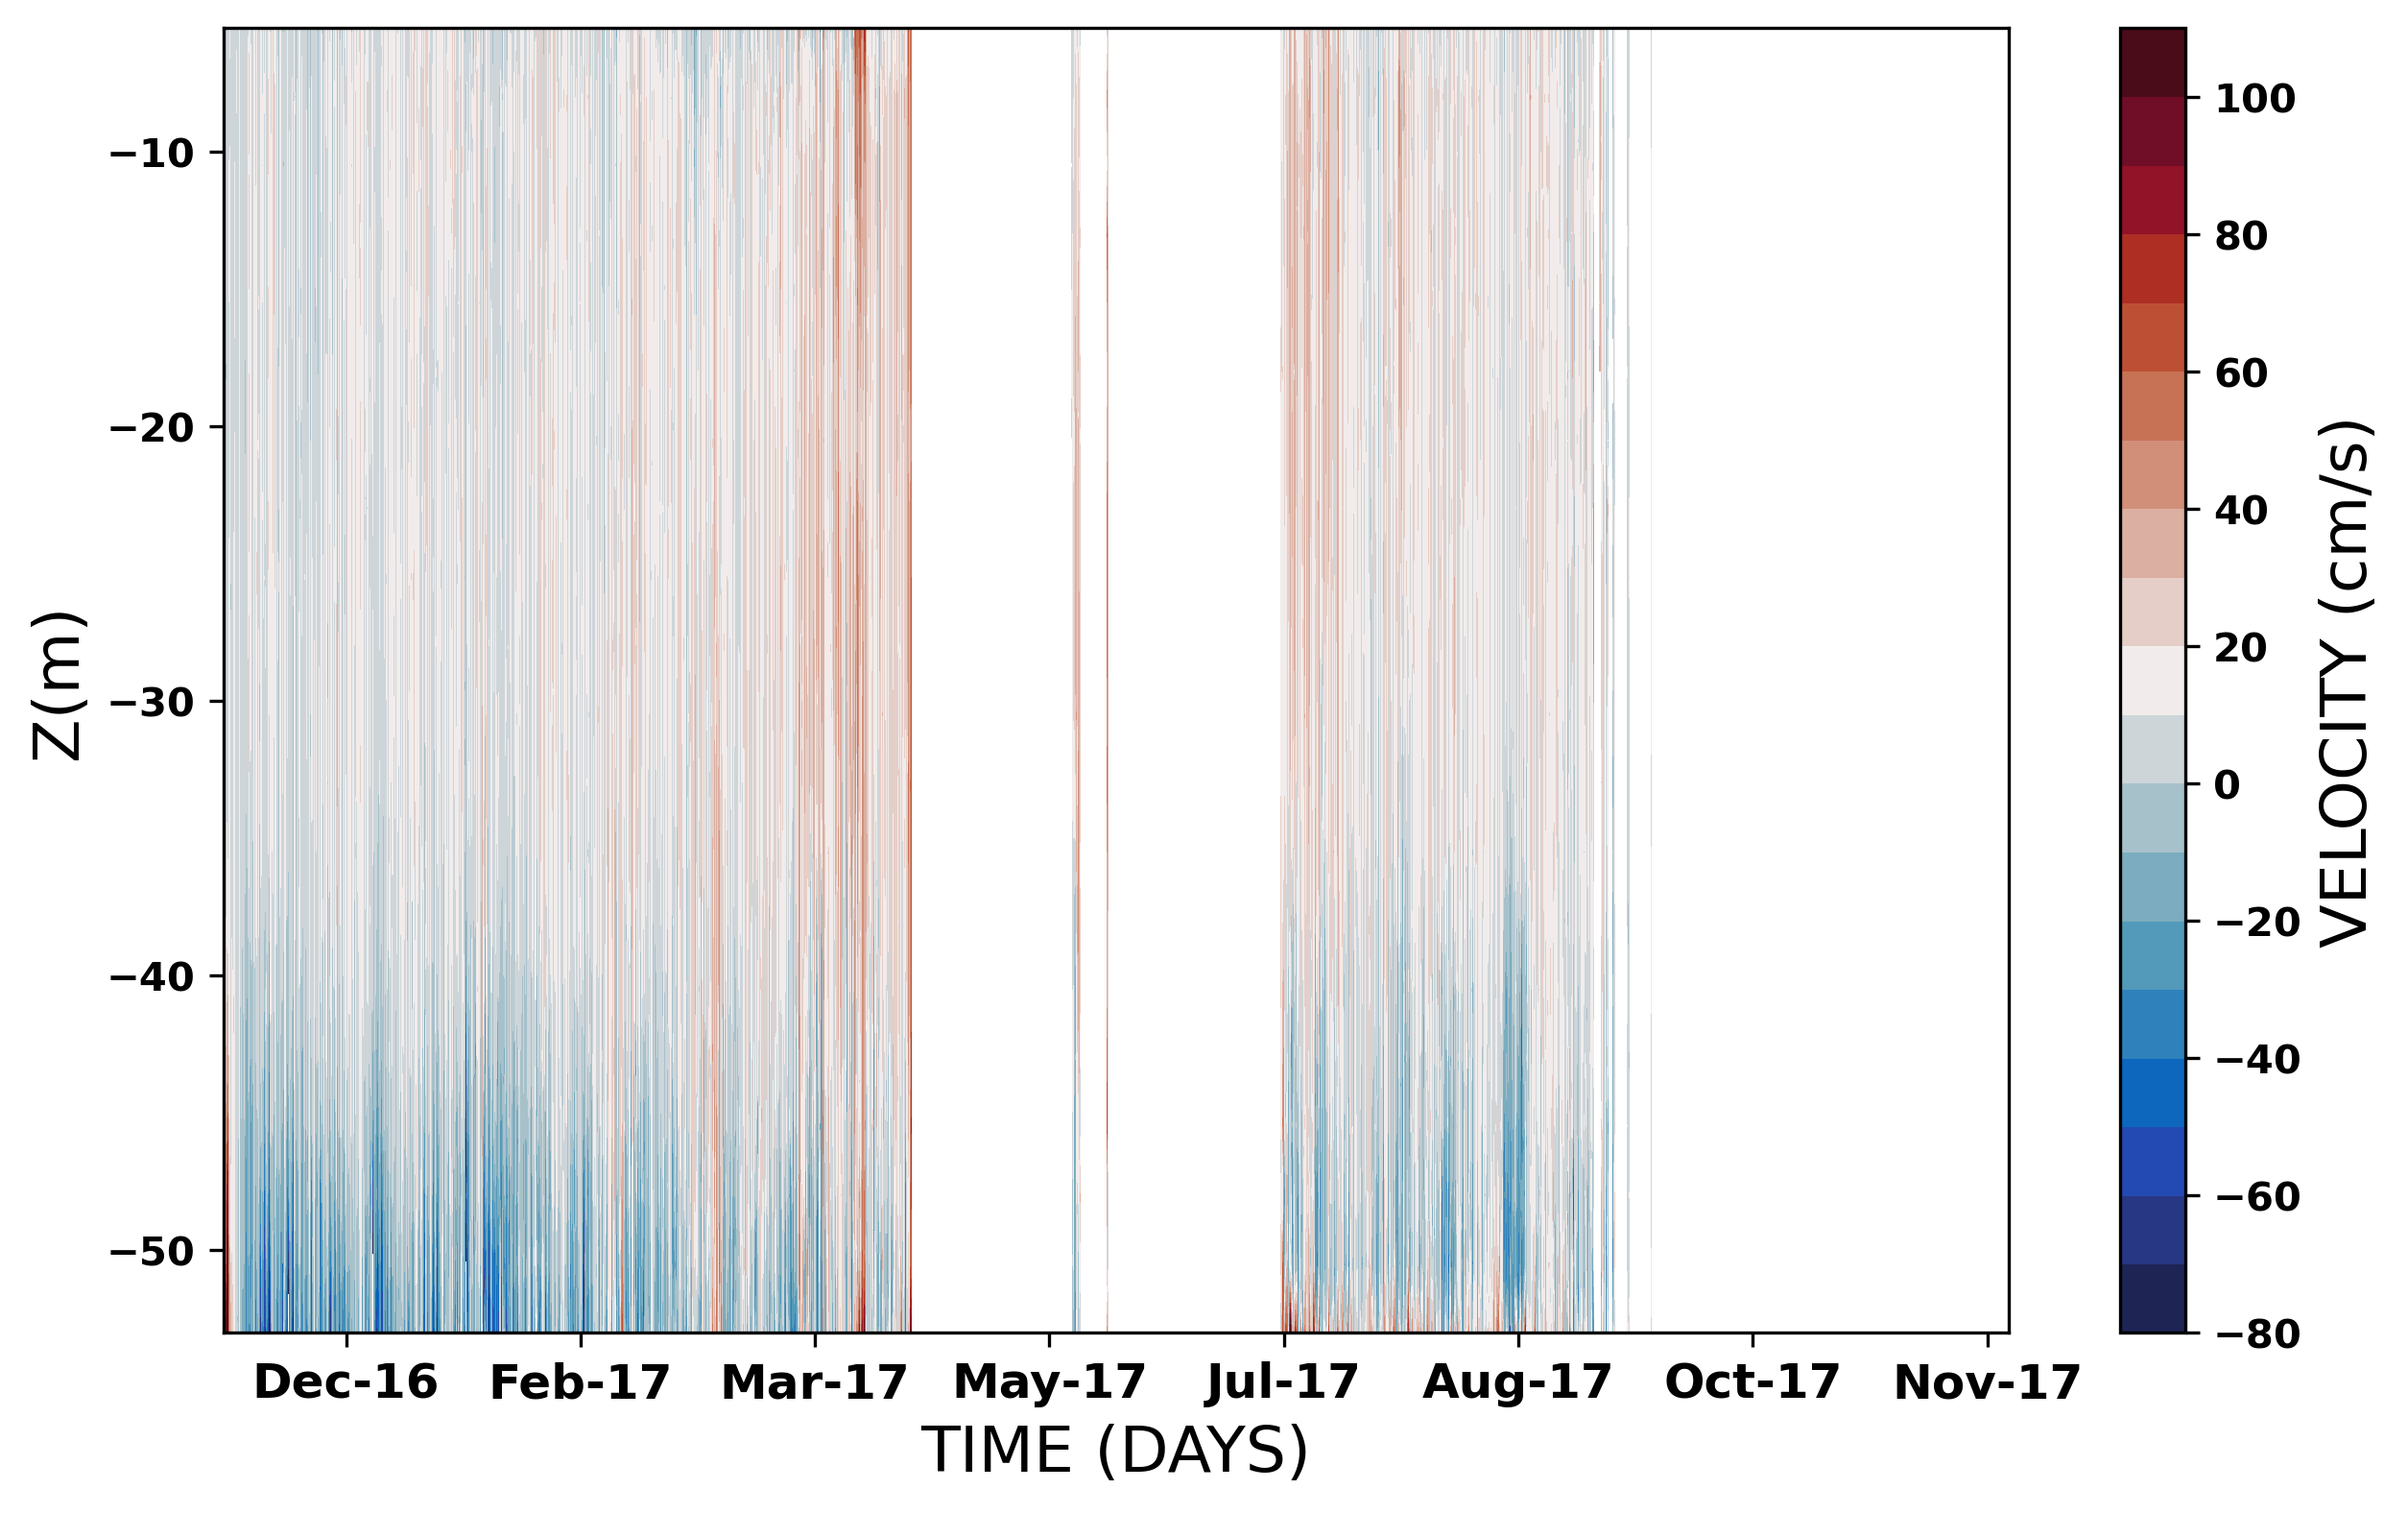

In [25]:
# - Componente perpendicular a costa -
myfmt = mdates.DateFormatter('%b-%y')
level = range(-80, 120, 10)

fig, ax = plt.subplots(figsize = (10,6), dpi=300)

cmap = ax.contourf(time2d, depth2d, ul,levels=level,cmap = cm.cm.balance)

cbar = plt.colorbar(cmap)

cbar.set_label('VELOCITY (cm/s)', fontsize=16)

ax.set_ylabel('Z(m)', fontsize = 16)
ax.set_xlabel('TIME (DAYS)', fontsize = 16)
ax.xaxis.set_major_formatter(myfmt)

#ax.set_title('Componente u')
#plt.savefig("/home/gus/Documentos/mestrado/dados-mestrado/"+
#            "figuras/correntes/comp_u.jpg",dpi=300)
plt.show()

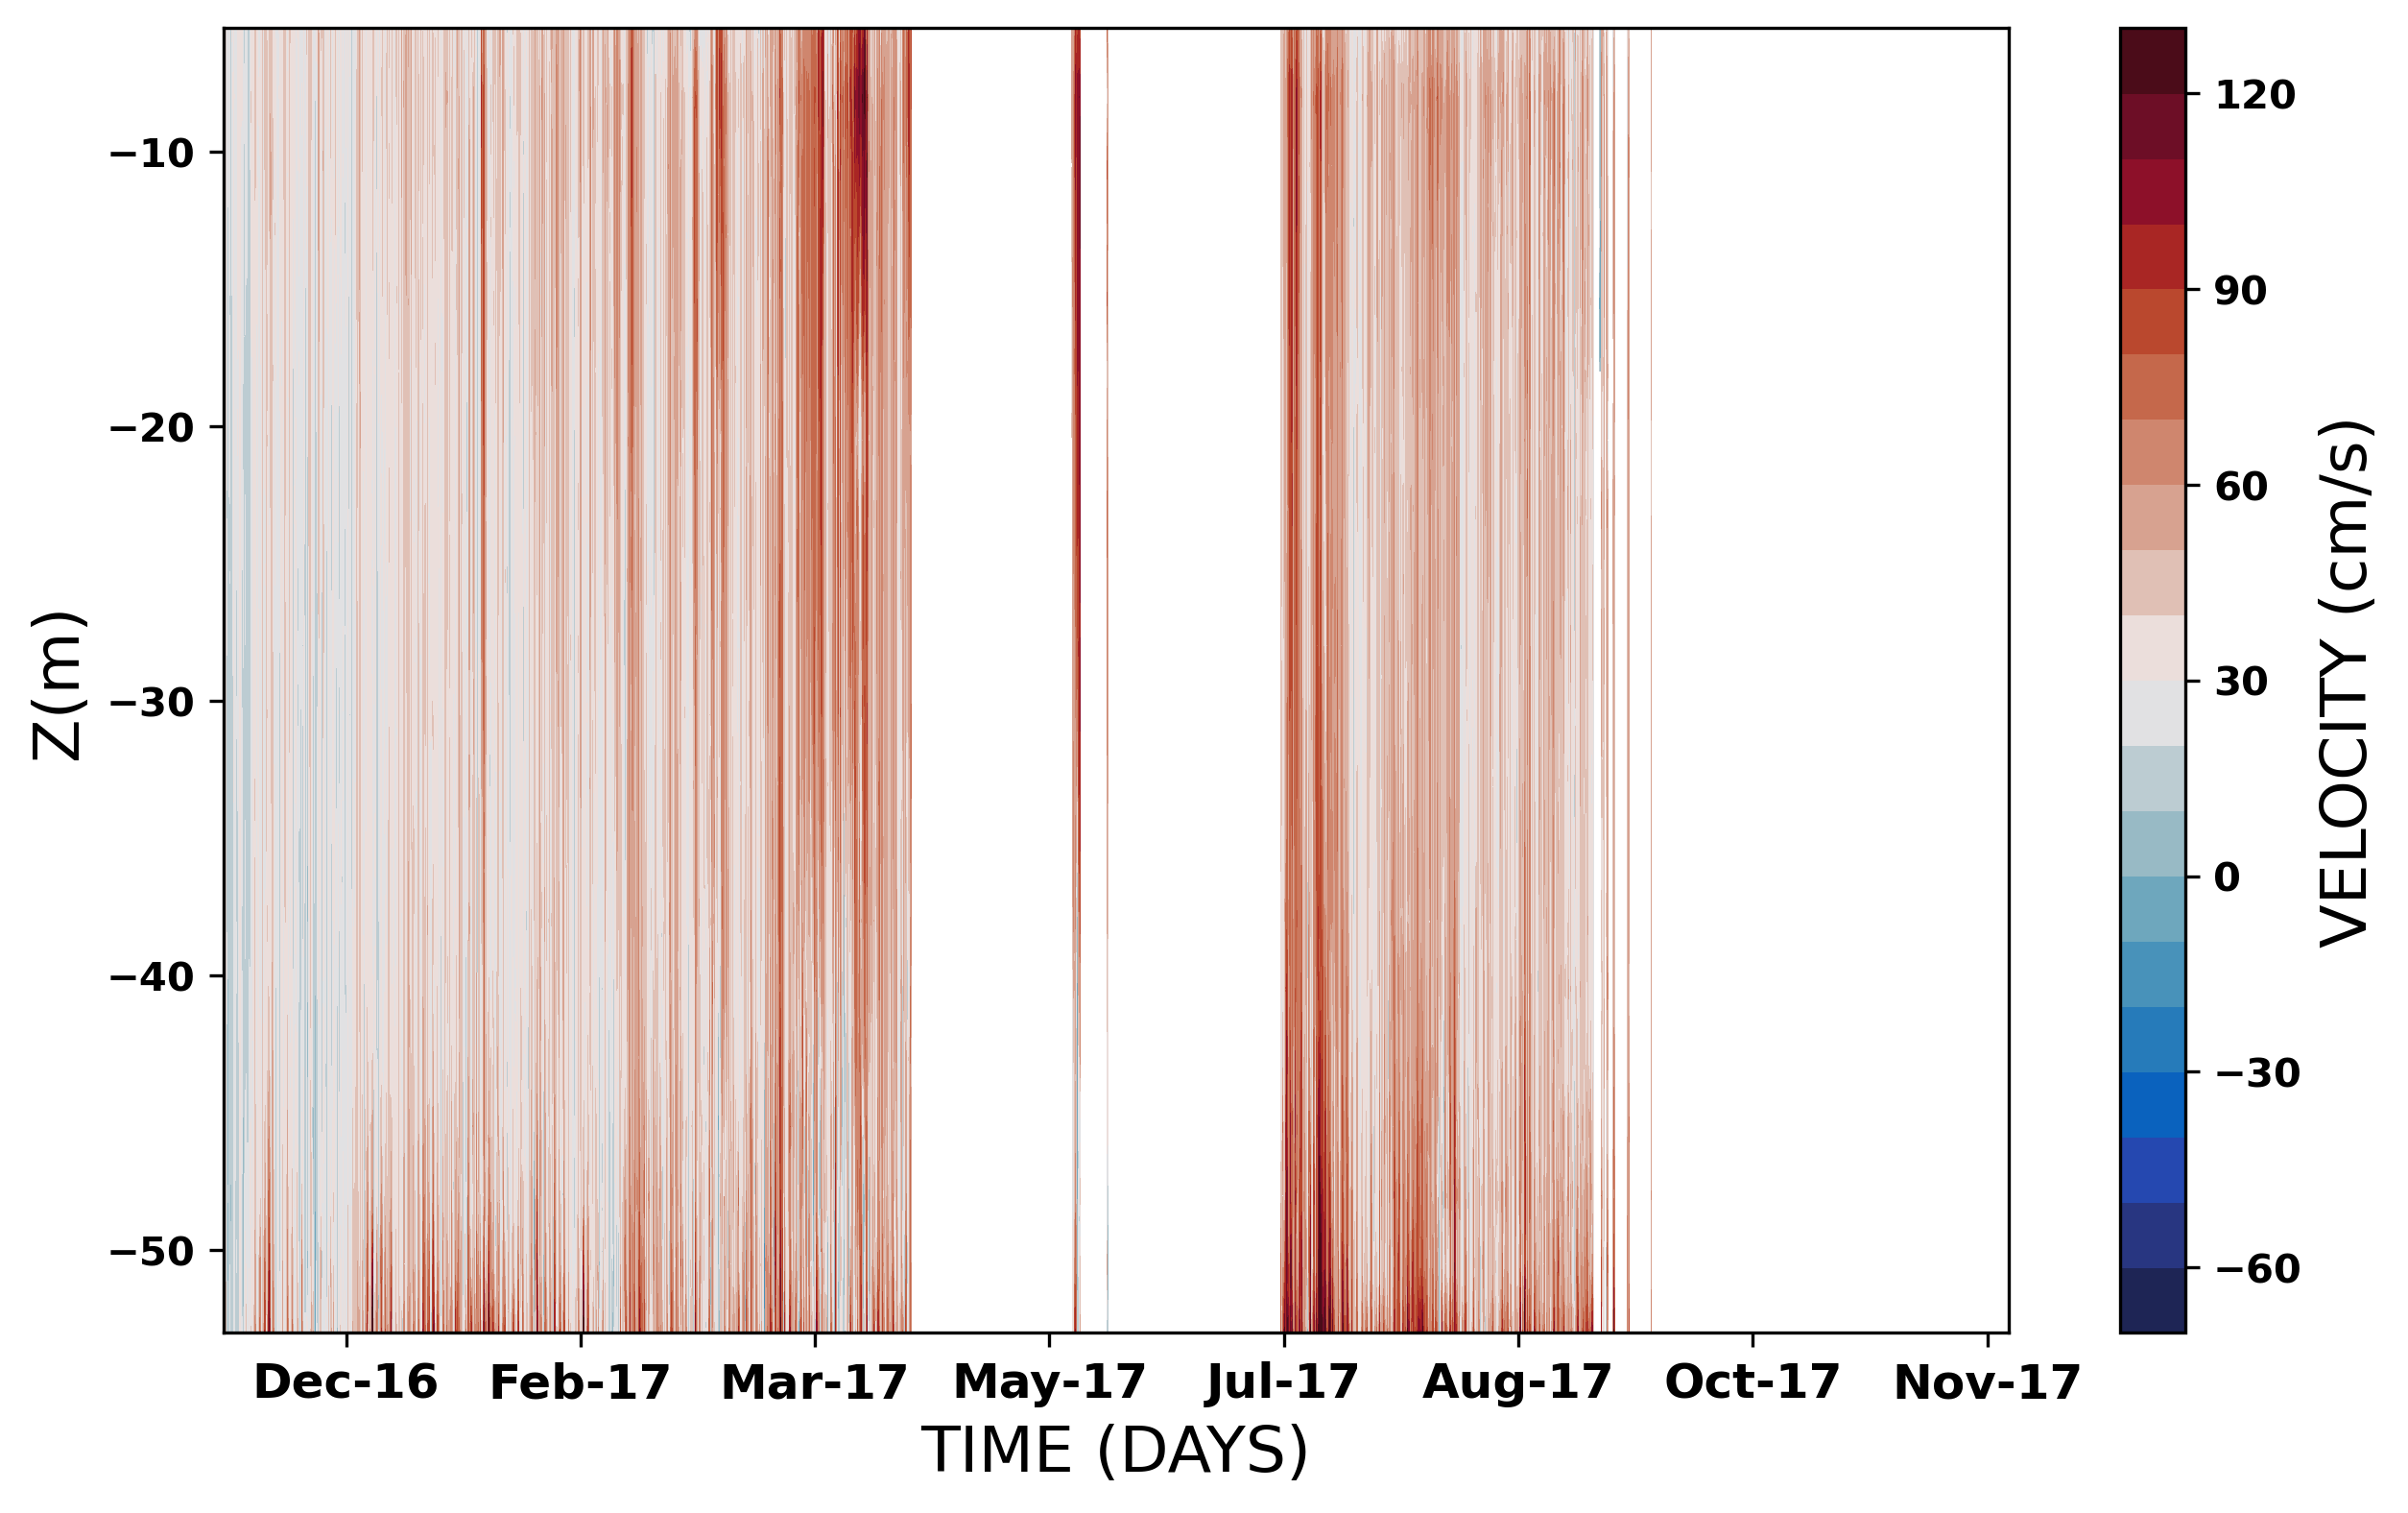

In [26]:
# componete paralela a costa ---

myfmt = mdates.DateFormatter('%b-%y')
#colorScale = np.arange(-150,150,10)
level = range(-70, 140, 10)

fig, ax = plt.subplots(1, figsize=(10,6), dpi=300);

cmap = ax.contourf(time2d, depth2d, vl,levels=level,cmap = cm.cm.balance)

cbar = plt.colorbar(cmap,orientation='vertical');

cbar.set_label('VELOCITY (cm/s)',fontsize=16);

ax.set_ylabel('Z(m)',fontsize=16)
ax.set_xlabel('TIME (DAYS)',fontsize=16)
ax.xaxis.set_major_formatter(myfmt)

#ax.set_title(r"Componente v")

#plt.savefig("/home/gus/Documentos/mestrado/dados-mestrado/"+
#           "figuras/correntes/comp_v.jpg", dpi=300)

## plot de linha da componente perpendicular

Text(0.5, 0, 'TIME(DAYS)')

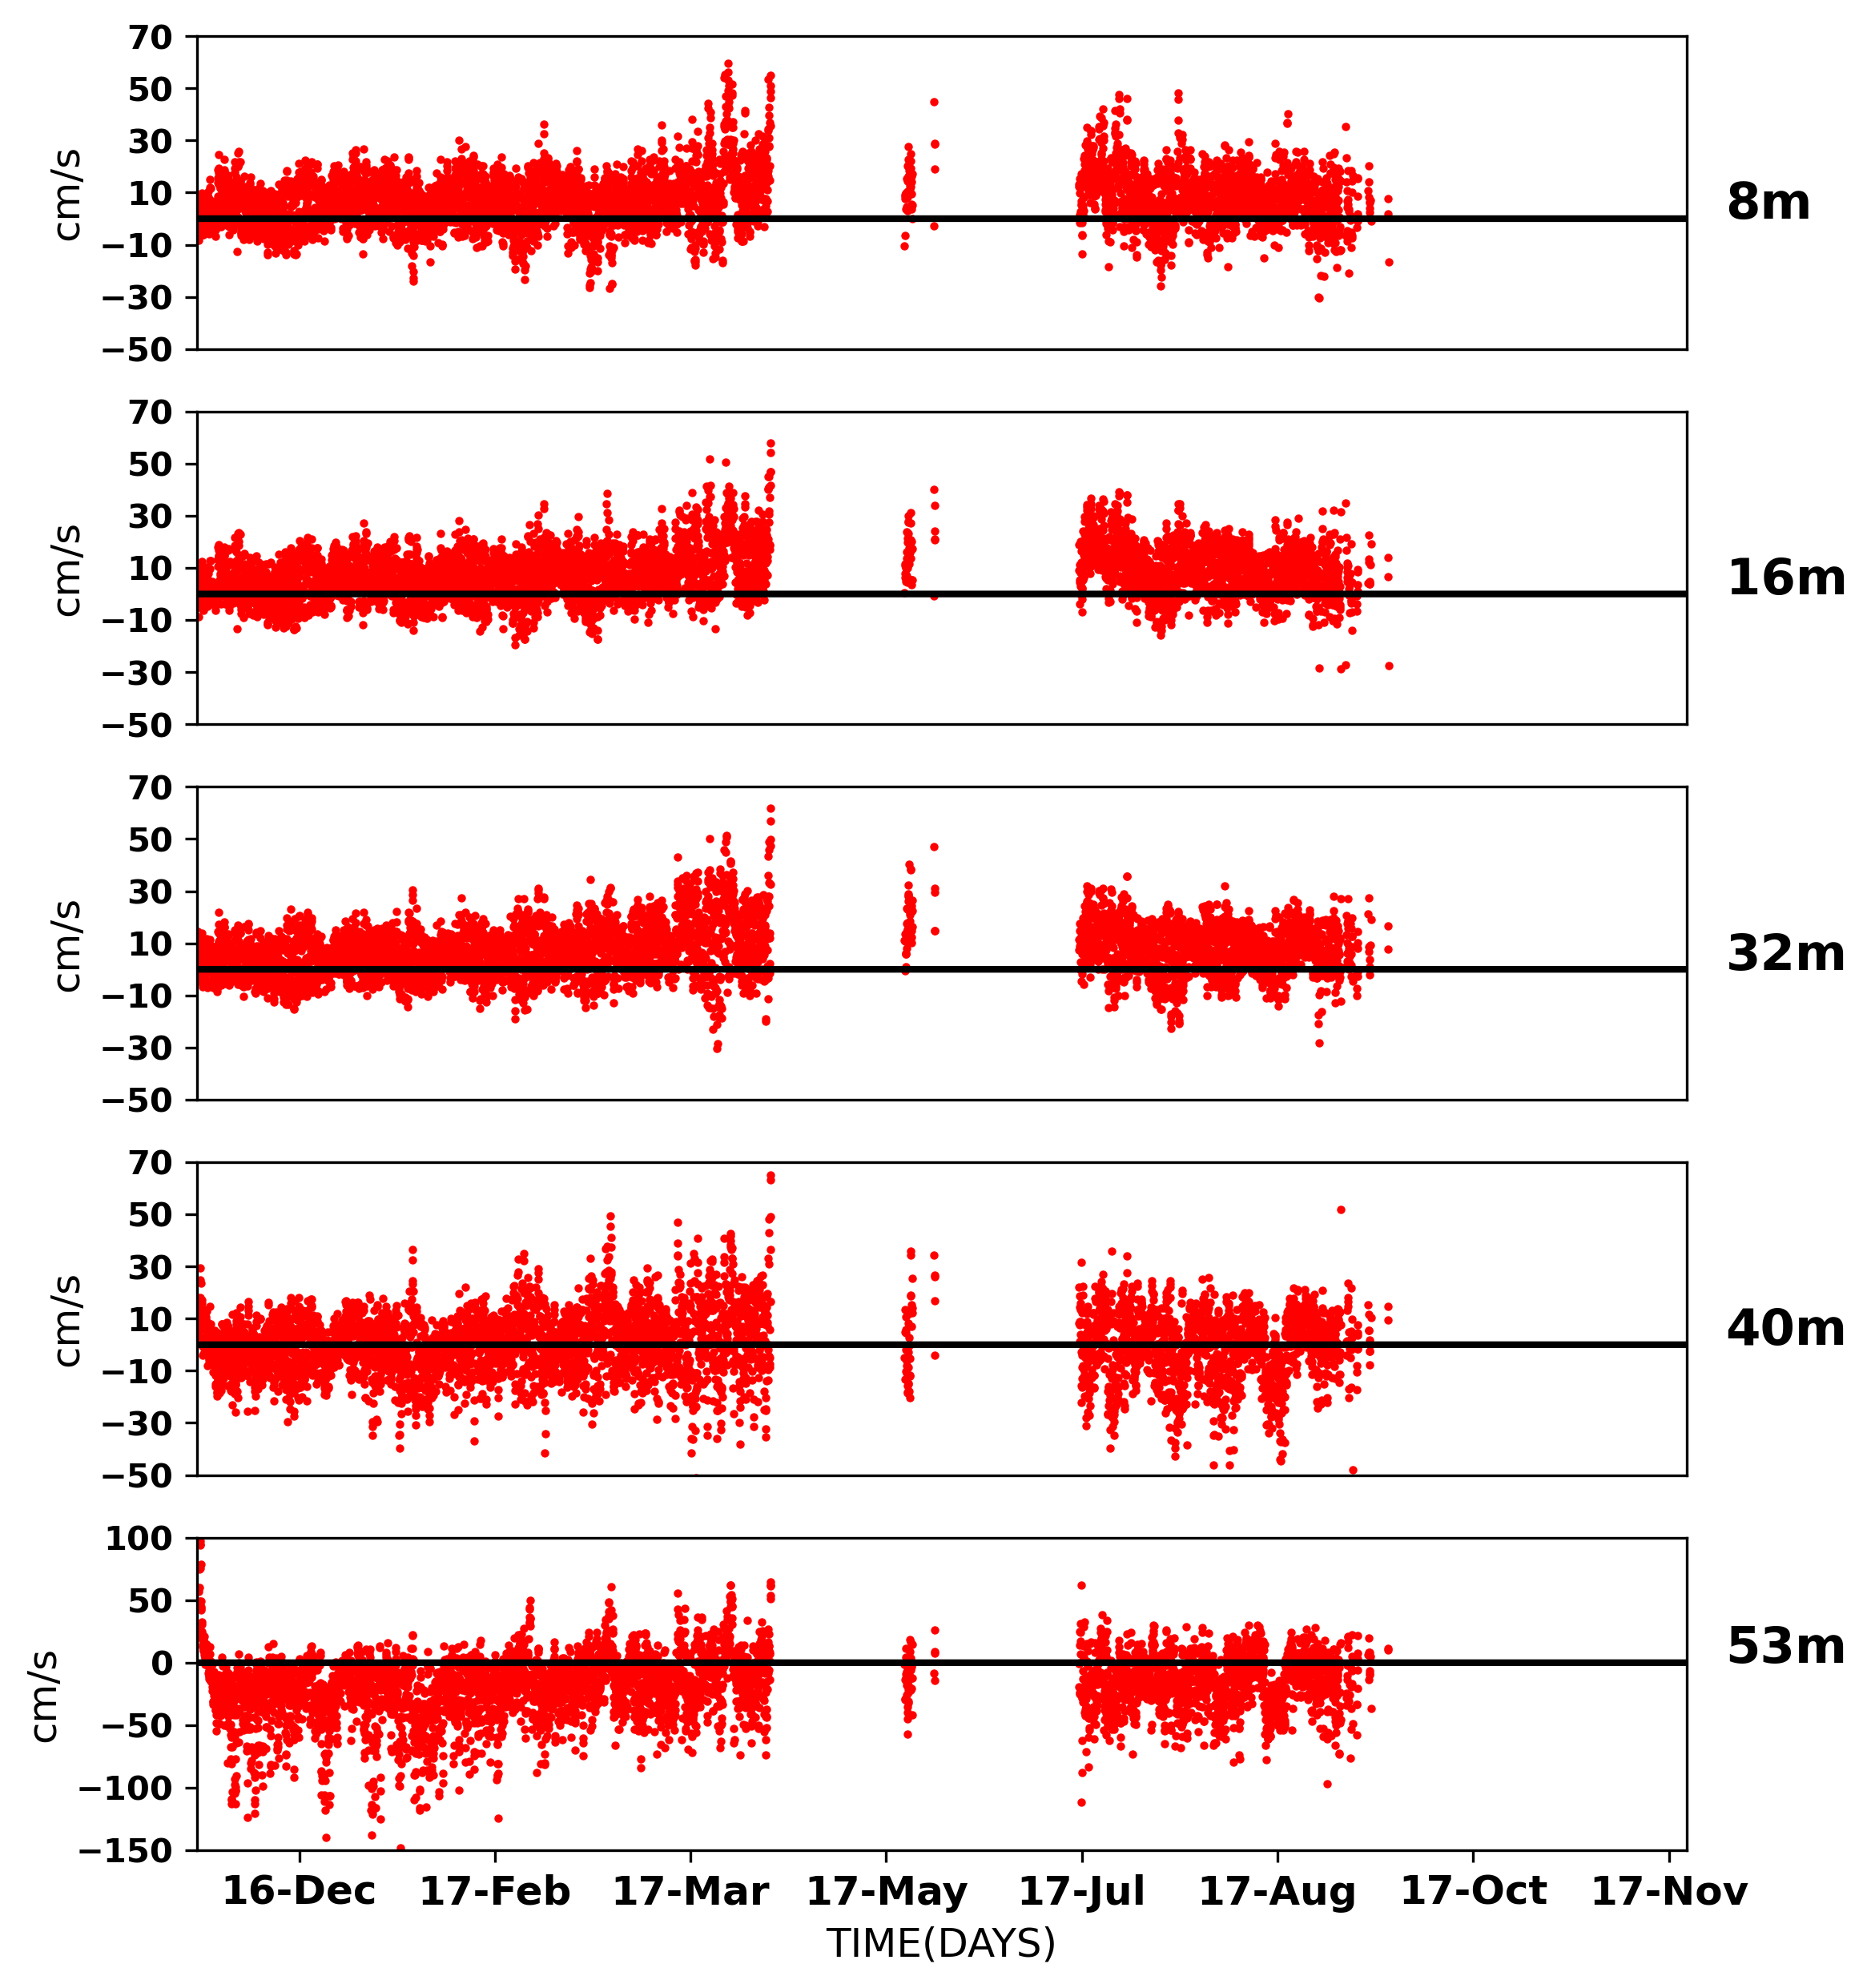

In [27]:
fig, ax = plt.subplots(nrows=5, figsize=(8, 10), dpi=300)

myfmt = mdates.DateFormatter('%y-%b')

#niveis = [1, 4, 10, 14, 18]
linhaZero = np.zeros([len(ul)])
legenda = ['8 m','16 m', '32 m','40 m', '53 m']

ax[0].plot(time, ul[:,1], marker='.', c='red')
ax[1].plot(time, ul[:,4], marker='.', c='red')
ax[2].plot(time, ul[:,10], marker='.', c='red')
ax[3].plot(time, ul[:,14], marker='.', c='red')
ax[4].plot(time, ul[:,18], marker='.', c='red')

ax[0].plot(time, linhaZero,lw=2,c='black')
ax[1].plot(time, linhaZero,lw=2,c='black')
ax[2].plot(time, linhaZero,lw=2,c='black')
ax[3].plot(time, linhaZero,lw=2,c='black')
ax[4].plot(time, linhaZero,lw=2,c='black')



ax[0].set_ylim([-50, 50])
ax[1].set_ylim([-50, 50])
ax[2].set_ylim([-50, 50])
ax[3].set_ylim([-50, 50])
ax[4].set_ylim([-100, 100])


# limites do grafico
ax[0].set_xlim([min(time), max(time)])
ax[1].set_xlim([min(time), max(time)])
ax[2].set_xlim([min(time), max(time)])
ax[3].set_xlim([min(time), max(time)])
ax[4].set_xlim([min(time), max(time)])



ax[0].set_ylabel('cm/s')
ax[1].set_ylabel('cm/s')
ax[2].set_ylabel('cm/s')
ax[3].set_ylabel('cm/s')
ax[4].set_ylabel('cm/s')



ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks([])




ax[0].set_yticks(range(-50, 80, 20 ))
ax[1].set_yticks(range(-50, 80, 20))
ax[2].set_yticks(range(-50, 80, 20))
ax[3].set_yticks(range(-50, 80, 20))
ax[4].set_yticks(range(-150, 150, 50))





# profundidades

ax[0].text(max(time)+10, 0, '8m', fontsize=15)
ax[1].text(max(time)+10, 0, '16m', fontsize=15)
ax[2].text(max(time)+10, 0, '32m', fontsize=15)
ax[3].text(max(time)+10, 0, '40m', fontsize=15)
ax[4].text(max(time)+10, 0, '53m', fontsize=15)

ax[4].xaxis.set_major_formatter(myfmt)
ax[4].set_xlabel('TIME(DAYS)')

### Plot da componente paralela a costa

Text(0.5, 0, 'TIME(DAYS)')

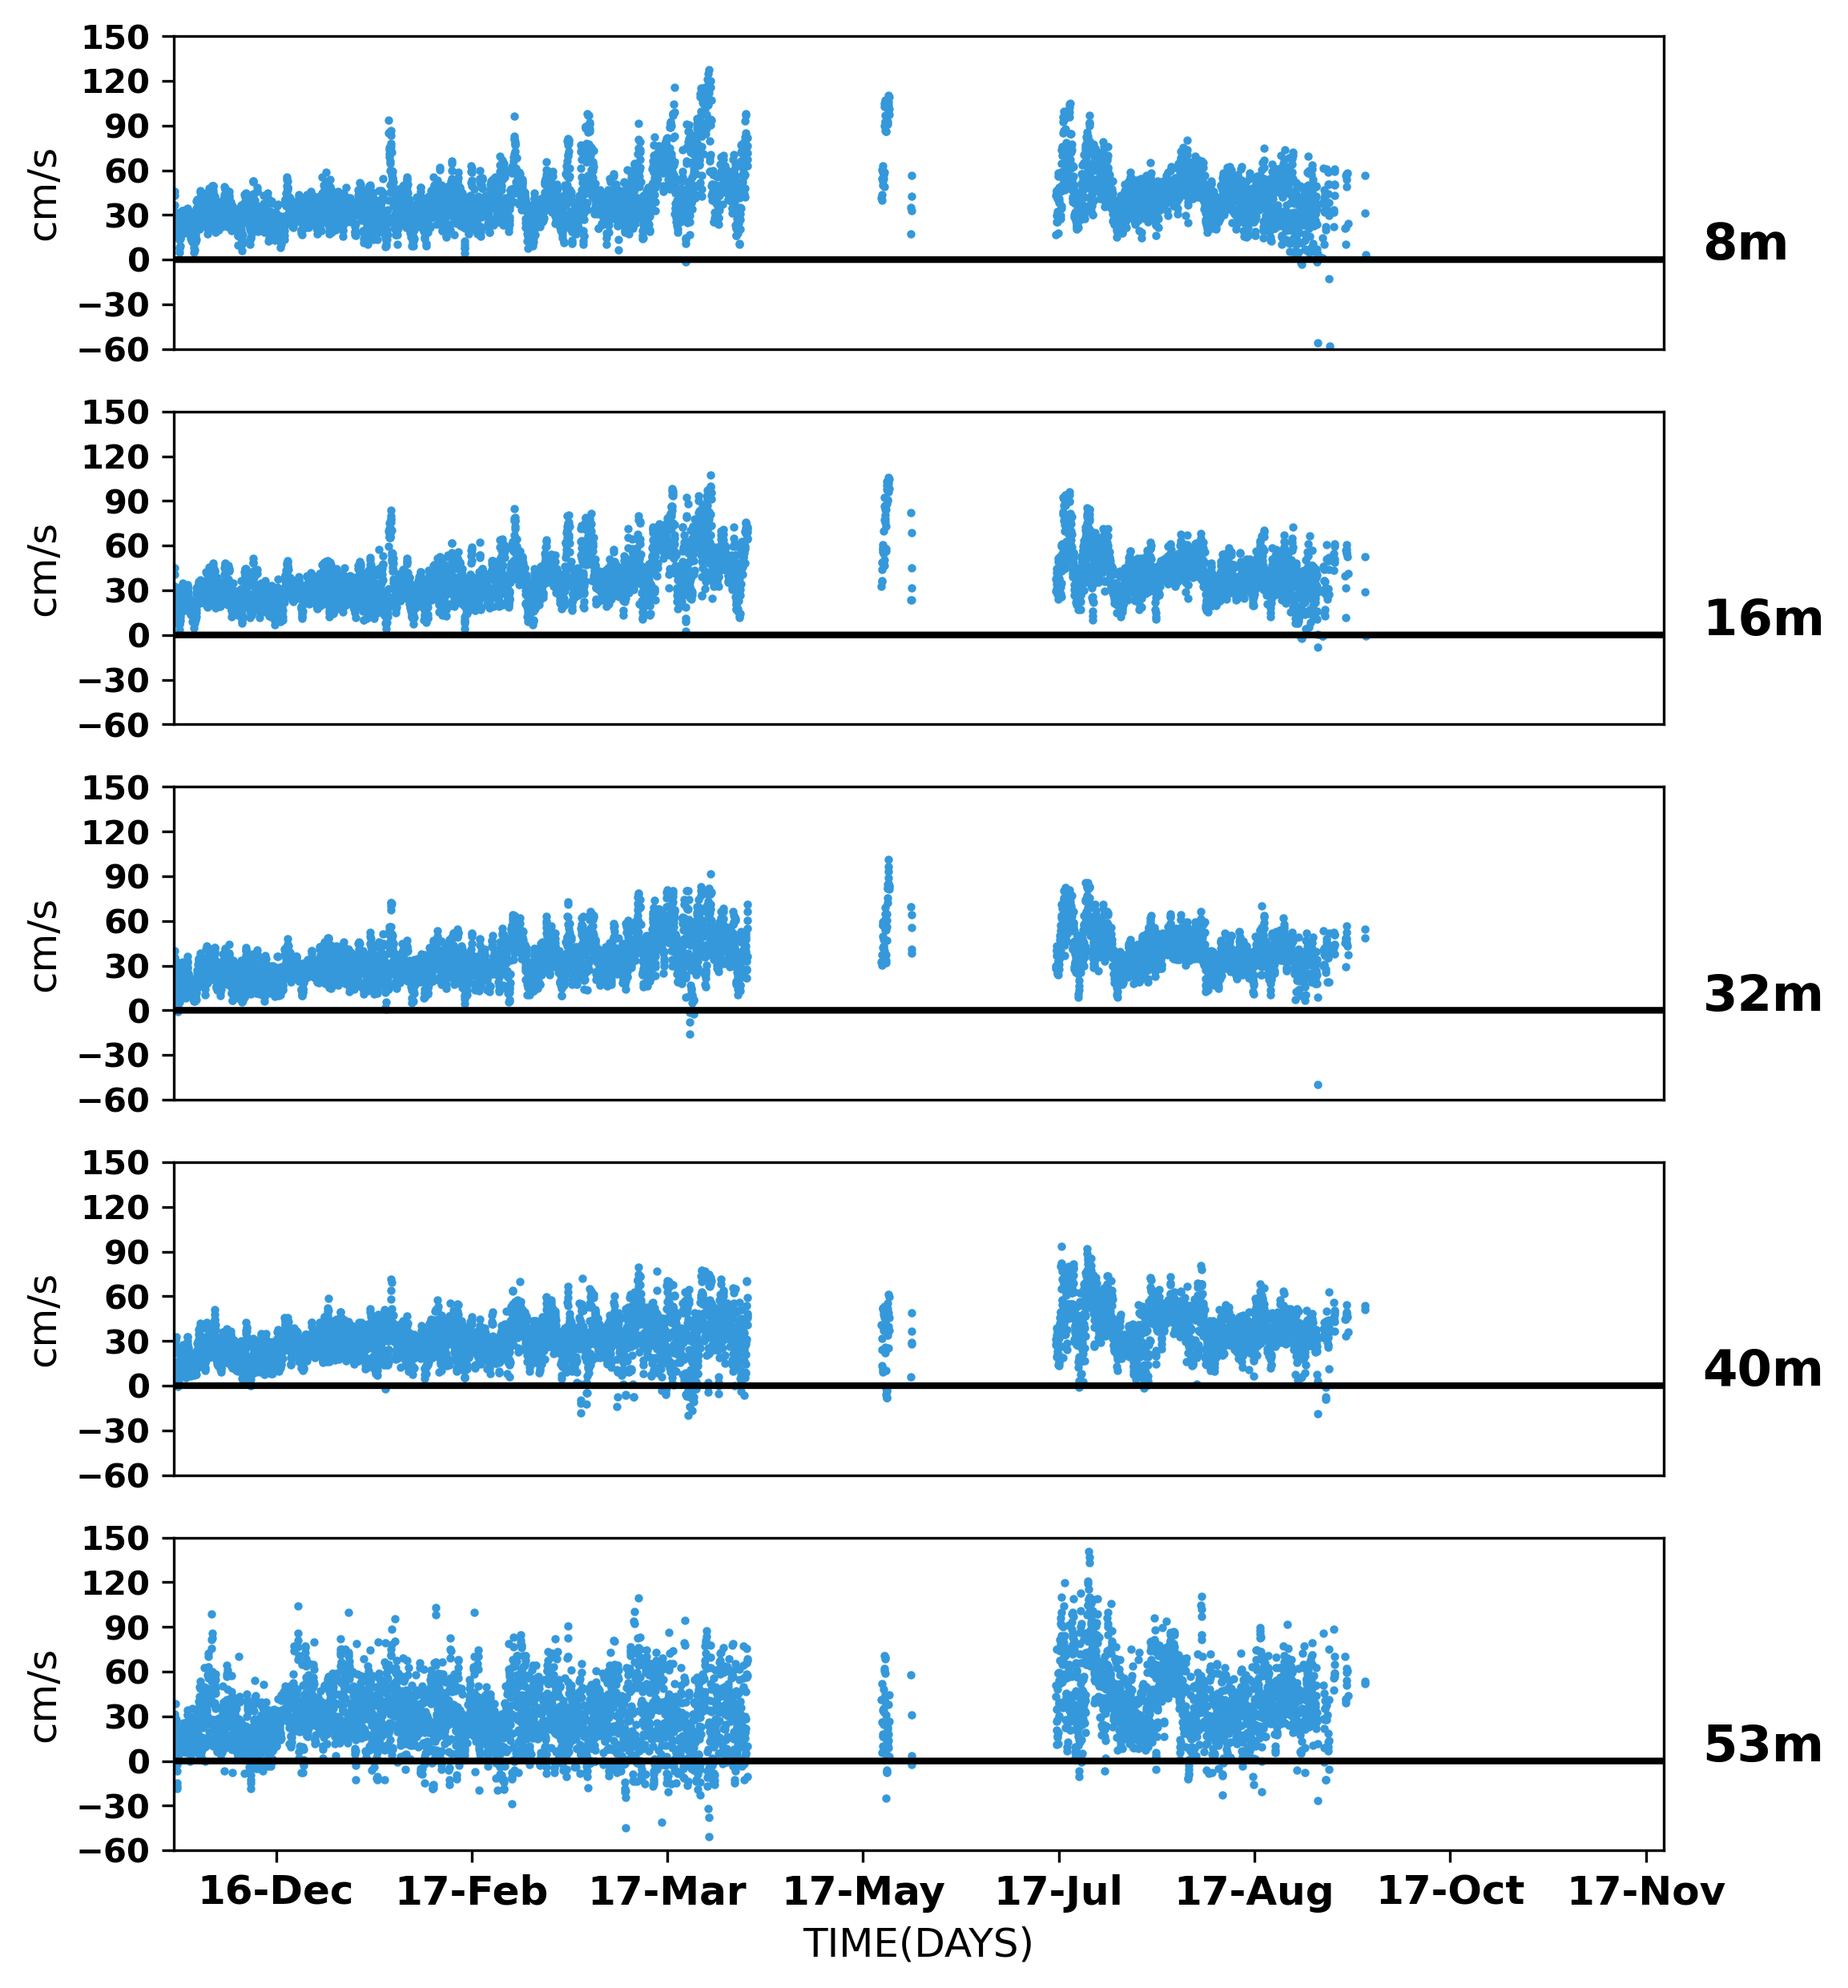

In [28]:
fig, ax = plt.subplots(nrows=5, figsize=(8, 10), dpi=300)

myfmt = mdates.DateFormatter('%y-%b')

#niveis = [1, 4, 10, 14, 18]
linhaZero = np.zeros([len(ul)])
legenda = ['8 m','16 m', '32 m','40 m', '53 m']

ax[0].plot(time, vl[:,1], marker='.', c='#3498db')
ax[1].plot(time, vl[:,4], marker='.', c='#3498db')
ax[2].plot(time, vl[:,10], marker='.', c='#3498db')
ax[3].plot(time, vl[:,14], marker='.', c='#3498db')
ax[4].plot(time, vl[:,18], marker='.', c='#3498db')

ax[0].plot(time, linhaZero,lw=2,c='black')
ax[1].plot(time, linhaZero,lw=2,c='black')
ax[2].plot(time, linhaZero,lw=2,c='black')
ax[3].plot(time, linhaZero,lw=2,c='black')
ax[4].plot(time, linhaZero,lw=2,c='black')



ax[0].set_ylim([-20, 150])
ax[1].set_ylim([-20, 150])
ax[2].set_ylim([-20, 150])
ax[3].set_ylim([-20, 150])
ax[4].set_ylim([-20, 150])


# limites do grafico
ax[0].set_xlim([min(time), max(time)])
ax[1].set_xlim([min(time), max(time)])
ax[2].set_xlim([min(time), max(time)])
ax[3].set_xlim([min(time), max(time)])
ax[4].set_xlim([min(time), max(time)])



ax[0].set_ylabel('cm/s')
ax[1].set_ylabel('cm/s')
ax[2].set_ylabel('cm/s')
ax[3].set_ylabel('cm/s')
ax[4].set_ylabel('cm/s')



ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks([])




ax[0].set_yticks(range(-60, 160, 30 ))
ax[1].set_yticks(range(-60, 160, 30))
ax[2].set_yticks(range(-60, 160, 30))
ax[3].set_yticks(range(-60, 160, 30))
ax[4].set_yticks(range(-60, 160, 30))





# profundidades

ax[0].text(max(time)+10, 0, '8m', fontsize=15)
ax[1].text(max(time)+10, 0, '16m', fontsize=15)
ax[2].text(max(time)+10, 0, '32m', fontsize=15)
ax[3].text(max(time)+10, 0, '40m', fontsize=15)
ax[4].text(max(time)+10, 0, '53m', fontsize=15)

ax[4].xaxis.set_major_formatter(myfmt)
ax[4].set_xlabel('TIME(DAYS)')

### salvando as  componentes paralelas e perpendiculares à costa
### (Período integral)

In [29]:
df_perpendicular = pd.DataFrame(ul);
df_paralelo = pd.DataFrame(vl);

In [30]:
time_string = uboia.time.copy()

In [31]:
df_paralelo['time'] = time_string;
df_perpendicular['time'] = time_string;

In [32]:
del time_string, uboia, vboia, ul, vl

### estatisticas

In [33]:
df_perpendicular.mean()

0      5.067093
1      7.197887
2      7.758875
3      7.875050
4      7.997434
5      7.985554
6      7.870504
7      8.072792
8      8.086468
9      7.784440
10     7.163007
11     6.273722
12     4.953563
13     2.666436
14    -0.130430
15    -3.746135
16    -7.913394
17   -13.314987
18   -19.229484
19   -19.457737
dtype: float64

In [34]:
df_paralelo.mean()

0     37.208355
1     40.573933
2     39.855091
3     38.909633
4     38.150374
5     37.286015
6     36.334477
7     36.394113
8     36.007659
9     35.525556
10    35.110746
11    34.804237
12    34.468850
13    33.746510
14    32.707645
15    31.698487
16    32.302007
17    32.496216
18    33.420435
19    39.570858
dtype: float64

### fim das estatisticas

In [35]:
#salvando
#df_perpendicular.to_csv('ul-2016-2017.csv', sep=';', index=False)
#df_paralelo.to_csv('vl-2016-2017.csv', sep=';', index=False)

In [36]:
#df_perpendicular.head()

In [37]:
who

ax	 cbar	 cm	 cmap	 depth	 depth2d	 df_paralelo	 df_perpendicular	 dt	 
fig	 legenda	 level	 linhaZero	 mdates	 myfmt	 np	 pd	 phi	 
plt	 scipy	 time	 time2d	 timedelta	 u	 v	 


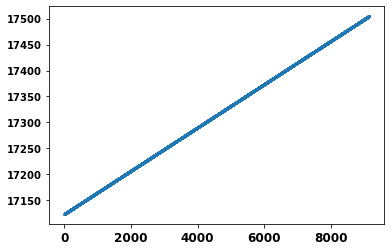

In [38]:
plt.plot(time,'.')

## Dividindo as séries temporais

In [39]:
import copy

In [40]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [41]:
plt.plot(df_perpendicular.iloc[:, 5],'.')
#plt.ylim([-60, 60])

In [42]:
df_perpendicular_dropado = df_perpendicular.dropna()
df_paralelo_dropado = df_paralelo.dropna()

In [43]:
timeDropado = df_perpendicular_dropado.time

In [44]:
timeDropadoDatetime = [dt.strptime(ii,'%Y-%m-%d %H:%M:%S') for ii in timeDropado]
timeDropadoDateNum = mdates.date2num(timeDropadoDatetime)

In [45]:
plt.plot(timeDropadoDateNum,'.')

In [46]:
len(timeDropado),len(timeDropadoDateNum),len(timeDropadoDatetime), len(df_perpendicular_dropado)

(3703, 3703, 3703, 3703)

In [47]:
#plt.plot(timeDropadoDateNum)

# Serie1-> [0:2538]
# Serie2 -> [2568:]

In [48]:
ulSerie1 = df_perpendicular_dropado.iloc[:2538,:].copy()
ulSerie2 = df_perpendicular_dropado.iloc[2568:3665,:].copy()

In [49]:
vlSerie1 = df_paralelo_dropado.iloc[:2538,:].copy()
vlSerie2 = df_paralelo_dropado.iloc[2568:3665,:].copy()

In [50]:
ulSerie1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
6,2.790259,3.747697,4.390195,6.221038,6.476387,4.777278,8.295676,8.233303,8.570635,9.628068,...,10.203772,12.324557,12.812204,12.893552,14.929196,17.156130,22.437219,28.754435,32.279778,2016-11-19 02:00:00
7,5.887022,5.593803,4.515630,4.672422,5.557242,6.137534,8.300191,8.033059,12.133426,12.952067,...,17.082939,16.439850,17.569432,17.986437,19.236069,21.186458,27.095238,24.088702,28.845526,2016-11-19 03:00:00


In [51]:
ulSerie1.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
3518,40.844026,35.668981,37.557725,42.593649,41.563573,38.250000,34.747970,38.154187,39.540794,45.497216,...,46.790272,41.138407,36.735270,36.570292,31.211307,32.841734,48.779621,53.685681,80.996971,2017-04-14 10:00:00
3521,57.545232,54.912141,44.545181,51.423009,54.251274,52.392926,45.858526,52.991273,54.659354,54.588644,...,60.905063,62.793394,64.155048,65.214899,68.881328,68.589552,61.721114,64.693586,43.520174,2017-04-14 13:00:00


In [52]:
ulSerie2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
5411,6.067726,1.318596e+01,19.004537,17.237815,19.022202,22.439128,1.535670e+01,18.778481,13.509796,2.087597,...,19.334686,24.915142,27.186641,22.215010,1.529948e+01,12.402269,1.381669,-19.531053,-22.812744,2017-07-02 07:00:00
5413,-2.553663,-8.881784e-15,-1.092354,-2.197329,-3.826697,1.040005,-5.329071e-15,1.632882,-0.657956,-2.406598,...,0.616070,0.609089,0.577675,1.176113,-8.881784e-15,-3.501704,-19.318262,-23.597941,11.576769,2017-07-02 09:00:00


In [53]:
ulSerie2.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,time
7011,-6.697396,-3.233478,-1.065814e-14,7.015386,2.80421,1.962598,4.009501,-8.881784e-15,-0.544515,-7.40281,...,-3.292647,-0.530553,-3.509837,-2.770004,-11.368431,-26.499231,-9.335235,-34.751274,-45.681951,2017-09-06 23:00:00
7012,9.041008,0.219008,1.039558e+00,-2.861564,20.92425,7.787228,6.198280,7.304390e+00,6.753115,10.14625,...,12.861437,6.532585,3.368775,7.984672,-6.025831,-22.394618,2.811816,14.527696,-28.342618,2017-09-07 00:00:00


In [54]:
len(ulSerie1), len(ulSerie2)

(2538, 1097)

In [55]:
len(vlSerie1), len(vlSerie2)

(2538, 1097)

In [56]:
time1SemLacunas = mdates.date2num(pd.date_range\
                                  (start='2016-11-19 02:00', end='2017-04-14 13:00', freq='1H'))

time2SemLacunas = mdates.date2num(pd.date_range\
                                  (start='2017-07-02 07:00', end='2017-09-07 00:00', freq='1H'))

In [57]:
time1ComLacunas = mdates.date2num([dt.strptime(ii,'%Y-%m-%d %H:%M:%S' ) for ii in ulSerie1.time]);
time2ComLacunas = mdates.date2num([dt.strptime(ii,'%Y-%m-%d %H:%M:%S' ) for ii in ulSerie2.time]);

In [58]:
ulSerie1SemLacunas = np.zeros([len(time1SemLacunas), 20])
vlSerie1SemLacunas = np.zeros([len(time1SemLacunas), 20])

In [59]:
ulSerie2SemLacunas = np.zeros([len(time2SemLacunas), 20])
vlSerie2SemLacunas = np.zeros([len(time2SemLacunas), 20])

In [60]:
ulSerie1SemLacunas[:] = np.NaN
vlSerie1SemLacunas[:] = np.NaN

In [61]:
ulSerie2SemLacunas[:] = np.NaN
vlSerie2SemLacunas[:] = np.NaN

## realocar as duas series temporais para tirar os gaps

In [62]:
# Serie 1
%time
for ii in time1ComLacunas:
    
    idx = np.where(time1SemLacunas == ii)
    idx = idx[0]
    
    ulSerie1SemLacunas[idx, :] = ulSerie1.iloc[time1ComLacunas == ii,:20]
    vlSerie1SemLacunas[idx, :] = vlSerie1.iloc[time1ComLacunas == ii,:20]

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.5 µs


In [64]:
if len(time1SemLacunas) == len(ulSerie1SemLacunas):
    print('Dados da serie 1 realocados com sucesso')

Dados da serie 1 realocados com sucesso


In [65]:
# Serie 2
%time
for ii in time2ComLacunas:
    
    idx = np.where(time2SemLacunas == ii)
    idx = idx[0]
    
    ulSerie2SemLacunas[idx, :] = ulSerie2.iloc[time2ComLacunas == ii,:20]
    vlSerie2SemLacunas[idx, :] = vlSerie2.iloc[time2ComLacunas == ii,:20]

CPU times: user 16 µs, sys: 2 µs, total: 18 µs
Wall time: 33.6 µs


In [66]:
ulSerie1SemLacunas = pd.DataFrame(ulSerie1SemLacunas)
vlSerie1SemLacunas = pd.DataFrame(vlSerie1SemLacunas)

In [67]:
ulSerie2SemLacunas = pd.DataFrame(ulSerie2SemLacunas)
vlSerie2SemLacunas = pd.DataFrame(vlSerie2SemLacunas)

In [68]:
time1SemLacunas = mdates.num2date(time1SemLacunas)
time2SemLacunas = mdates.num2date(time2SemLacunas)

In [69]:
ulSerie1SemLacunas['time'] = time1SemLacunas
vlSerie1SemLacunas['time'] = time1SemLacunas

ulSerie2SemLacunas['time'] = time2SemLacunas
vlSerie2SemLacunas['time'] = time2SemLacunas

#### Salvando

In [ ]:
scipy.io.savemat('ulSerie1', mdict, appendmat=True, format='5',

In [67]:
ulSerie1SemLacunas.to_csv('adcp_cortados/ulSerie1.csv', sep=';', index=False)
vlSerie1SemLacunas.to_csv('adcp_cortados/vlSerie1.csv', sep=';', index=False)

In [68]:
ulSerie2SemLacunas.to_csv('adcp_cortados/ulSerie2.csv', sep=';', index=False)
vlSerie2SemLacunas.to_csv('adcp_cortados/vlSerie2.csv', sep=';', index=False)

### FIM